# Workshop 1: Modeling COVID-19 Spread with Data Science
## Author: Nab Kar (nkar@princeton.edu)

Sections:
* Getting started
* What is linear regression?
* How can we use regression to model the growth of COVID-19 in the USA?

## Part 0: Getting started
We first get the data into our Google Colab environment from a Github repository.

Github is a standard tool used by software developers and computer programmers of all types that makes it easy to share, update and keep track of code. It is used accross industry and academia for both personal and team-oriented projects.

The Github repository for this project, https://github.com/karnabhonil/PDS_Workshop_9_25_20, simply contains this notebook and the data for this workshop. The data comes directly from the [CDC's webpage](https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36) and is updated daily.

In [ ]:
# This is a code cell--we can execute Python code here.
# Note that lines in the coding cells that start with '#' are comments and not interpretted as computer code.
# They are great for explaining what your code is doing in plain English!
# Also note the line below starts with '!'--these lines are interpretted as shell commands.
!git clone https://github.com/karnabhonil/PDS_Workshop_9_25_20

fatal: destination path 'PDS_Workshop_9_25_20' already exists and is not an empty directory.


The data is now in our environment. Confirm that it's in its proper place by clicking the folder on the left-hand side of the screen and checking what was exactly copied before continuing (you should be able to find a file called 'United_States_COVID-19_Cases_and_Deaths_by_State_over_Time' in the 'data' folder).

Python allows for users to use *libraries* (groups of related functions) created by the community. In fact, libraries are one of the reasons Python is so widely used! There is a vast body of great libraries that Python programmer rely on regularly.

In [ ]:
# We import several key libraries here:
#   'numpy' and 'pandas' for handling our data
#   'matplotlib.pyplot' for our graphs and figures
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Note that we import each of the libraries *as* a different name. This is for clarity and faster development. Now, we can use the shorthand *plt* to refer to *matplotlib.pyplot* (which is quite tedious to type out)!.

We noted that *pandas* is our go-to library for handling out data. We will use its *read_csv()* function to read in our raw data. Use this function to set a variable *df* to hold our data. To find the data file, look through the directory on the left-hand side of the screen. Remember that filepaths take the format: 'folder1/folder2/another_folder/my_data.csv'. After calling *read_csv()*, *pandas* will store the data in what it called a 'DataFrame'. You can think of it as a well-organized table or matrix of the data.

One convenient way to see what a variable holds in Python is by simple typing the variable's name as it's own line of code at the end of a code cell. After setting the variable, let's check what the content of 'df' are by doing this.

In [ ]:
### 1. YOUR CODE HERE


You've successfully loaded the data into Python! What does the data look like? What different information does it contain (and which of these are we primarily interested in)? How many samples does the data contain? How is it structured?

## Part 1: What is linear regression?
Linear regression is a statistical method that seeks to *find the linear relation between a set of inputs and a set of output*. Here we will examine the simple case of when there is one input $X$ and one output $Y$. In practice, we observe *data* which appear as the pairs $\{(X_i, Y_i)\}_{i=1}^n$ and we want to learn the relation between the input and the output.

Specifically, we assume that that values of $Y_i$ are *a linear function* of the values of $X_i$. However, in real data science problems, there is almost never a perfect linear relation between the input and the output! There is always some noise or error that comes with the observations. So out model can be summarized as:
$$Y_i = \alpha + \beta X_i + \epsilon$$

Informally, this means that the input/output pairs lie more or less along a line but with an additional perturbation. Consider the following example:

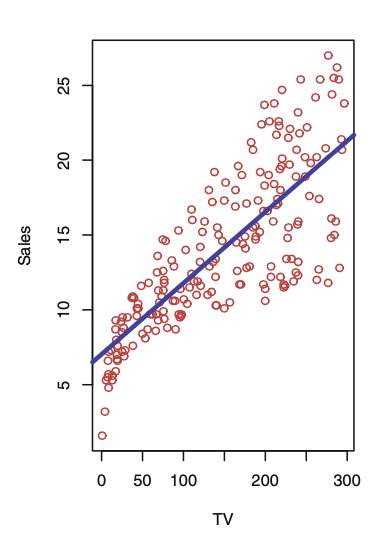

Source: *An Introduction to Statisitcal Learning* (2013)

The problem of linear regression is then intuitive: we want to figure out what $\alpha$ and $\beta$ are, since this tells us the relation between $X_i$'s and $Y_i$'s! 
Before going into how we estimate the unknown parameters $\alpha$ and $\beta$, we quickly introduce the concept of *prediction*. For some value of the input we have never seen before $X_{new}$, we can *predict* the vaue of $Y_{new}$ using the coefficients:
$$\hat{Y}_{new} = \alpha + \beta X_{new}$$

Here, the *hat* on top of $\hat{Y}_{new}$ denotes an *estimate* or *prediction* of the value. The real value is $Y_{new}$, and the value predicted by our model is $\hat{Y}_{new}$. This important distinction will be relevant soon.

Back to the question at hand: we don't actually know $\alpha$ and $\beta$--how do we learn them? Of course, we use data! More specifically, for each pair of data, we want each prediction from our model for the output variable $\hat{Y}_i$ to be close to the actual value $Y_i$. We can measure how close these two values are using the following metric:
$$(Y_i - \hat{Y}_i)^2$$

This metric looks at a specific $i$. It would make sense to be concerened about how well our model predicts for *all* of the $i$'s ($i = 1, \ldots, n$). In fact, let's look at the *mean squared error*:
$$\frac{1}{n} \sum_{i=1}^n (Y_i - \hat{Y}_i)^2 = \frac{1}{n} \sum_{i=1}^n (Y_i - \alpha - \beta X_i)^2$$

Below is a diagram of the same data above but with the errors $Y_i - \hat{Y}_i$ shown as gray lines.



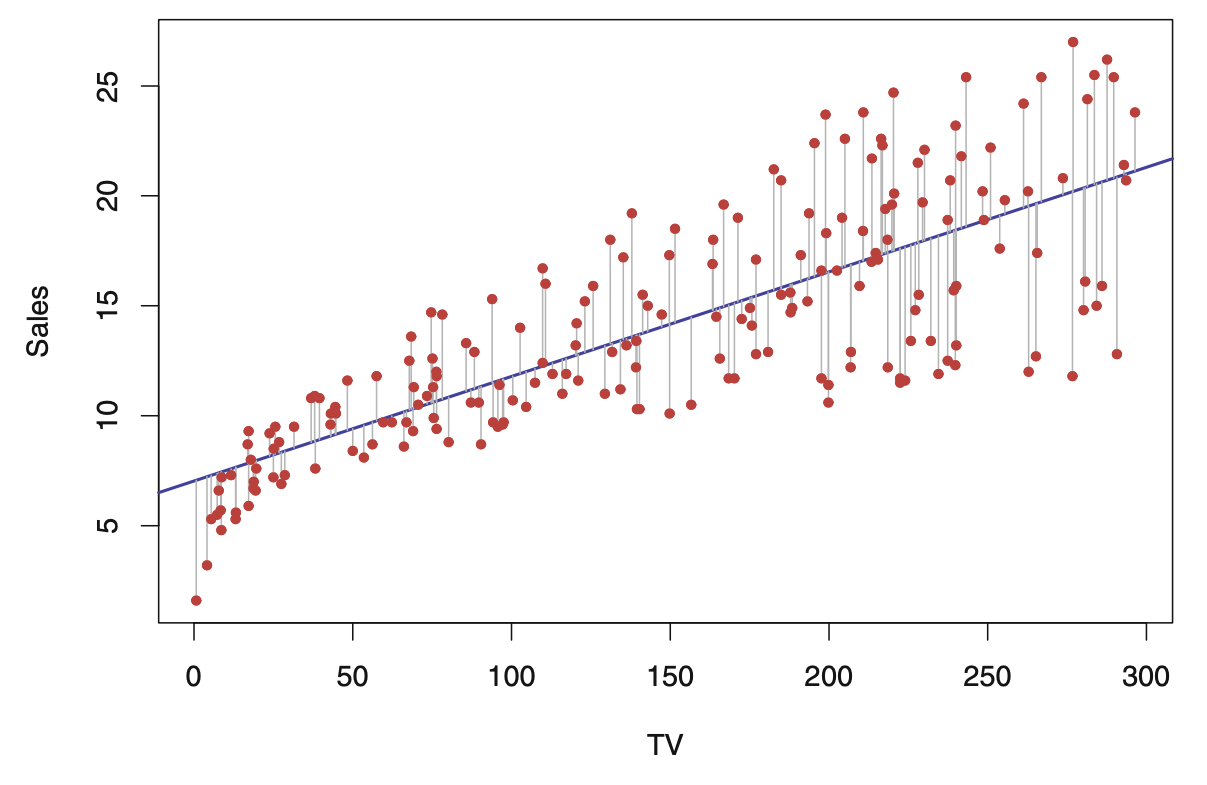
Source: *An Introduction to Statistical Learning* (2013)

So we have defined a metric that tells us how good a specific selection of $\alpha$ and $\beta$ in terms of minimizing the *mean squared error*. Now, we want to pick the *best* $\alpha$ and $\beta$:
$$\hat{\alpha}, \hat{\beta} = \textrm{argmin}_{\alpha, \beta} \left[\frac{1}{n} \sum_{i=1}^n (Y_i - \alpha - \beta X_i)^2\right]$$

Again, "the best" $\alpha$ and $\beta$, which we call $\hat{\alpha}$ and $\hat{\beta}$, are in fact "the best" since they *minimize* the mean squared error. (That's all the fancy equation above says!)

Now the best part. One of the wonderful things about linear regression is that $\hat{\alpha}$ and $\hat{\beta}$ are easy to find! Without going into further detail, we present the formulas for the optimal solutions:

$$\hat{\alpha} = \bar{Y} - \hat{\beta} \bar{X}$$
$$\hat{\beta} = \frac{\sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})}{\sum_{i=1}^n (X_i - \bar{X})^2}$$

where $\bar{X} = \frac{1}{n} \sum_{i=1}^n X_i$ and $\bar{Y} = \frac{1}{n} \sum_{i=1}^n Y_i$.

What is so great about these solutions is that they can be calculated very easily. In fact, there are many statistical packages that will compute them for you provided the training data $\{X_i, Y_i\}_{i=1}^n$.

## Part 2: How can we use regression to model the growth of COVID-19 in the USA?

Let's take a look at our data again. Recall that you can see the contents of a variable simply by typing its name.

In [ ]:
### 2. YOUR CODE HERE


Let's go over some basic pandas operations now. First, let's pick a state of interest so we aren't overwhelmed with data. 
Go to [menti.com](https://www.menti.com/) and use the code **80 00 20 3** to vote!

Let the variable *state* contain a string of two characters that specifies the state.


In [ ]:
### 3. YOUR CODE HERE


We can access individual columns of our DataFrame by using square bracks, *\[...\]*. Find which rows of our data contains our state of interest. This will be a boolean (True/False) pandas Series--store it in a variable called *idx*.



In [ ]:
### 4. YOUR CODE HERE


Now, let's grab the rows that correspond to our state of interest. We can again do this with square brackets, but must also precede it with the pandas keyword *.loc* (e.g. *df.loc[...]*). What *.loc* does is it specifies the square brackets to grab *rows* rather than *columns*. Recall that to grab columns, we do not include *.loc* (e.g. *df[...]*). After grabbing the rows of interest, let's look at the columns *submission_date* and *tot_cases* only. Store these in a variable *df_state*.


In [ ]:
### 5. YOUR CODE HERE


We can also rename out columns if we wish using *.rename()*. Additionally, we reset the index values since they currently have retained their old values from *df*. Here is a good time to introduce Python's native *help()* function. Use it on another function name to read it's documentation.

In [ ]:
df_state = df_state.reset_index(drop=True)
df_state = df_state.rename({'submission_date': 'date', 'tot_cases' : 'cases'}, axis='columns')
df_state

Now, let's grab our $X$ and $Y$ data for our linear regression model. We must have these variables *X* and *Y* as numpy arrays. What should we let *X* and *Y* be? Go back to [menti.com](https://www.menti.com/) using the code **80 00 20 3** to vote!

In [ ]:
### 6. YOUR CODE HERE


In [ ]:
### 7. YOUR CODE HERE


Before performing the regression, why don't we take a look at it via a plot. Using *matplotlib*'s functions $scatter()$, $xlabel()$, $ylabel()$, $title()$ and $show()$ to display $X$ and $Y$.

In [ ]:
### 8. YOUR CODE HERE

# plt.xticks(ticks=X[::15], labels=df_state['date'][::15], rotation=45)

We can now import our regression model from *sklearn*. *sklearn* is a popular machine learning library for Python that supports many different learning algorithms. Since we are only interested in a single model, we can specify our import statement to grab only the function of interest without loading the whole library into Python.

In [ ]:
from sklearn.linear_model import LinearRegression
mdl_lin = LinearRegression()
mdl_lin

We have now created an untrained linear regression model *mdl_lin*. So far *mdl_lin* has seen no data and thus does not have the values of $\hat{\alpha}$ and $\hat{\beta}$ fitted. Fit the model using the *.fit(...)* method. Once fit, we can call *mdl1.coef_* and *mdl1.intercept_* to see the coefficient and intercept, respectively.

In [ ]:
### 9. YOUR CODE HERE


These are the optimal $\hat{\alpha}$ (*mdl1.intercept_*) and  $\hat{\beta}$ (*mdl1.coef_*) values that we had discussed earlier! Now that we have 'learned' or 'estimated' these values, we can make predictions about $Y$ from observations of $X$. Recall that these predicted values are denoted with a 'hat', $\hat{Y}$. Let's compute them below in a variable *Y_hat* using the *.predict()* method of our model.

In [ ]:
### 10. YOUR CODE HERE


Let's take a look at how our predicted values compare to our actual values by plotting again. Use the same functions as before, with the addition of *plot()*, to now display both the true values and predicted values.

In [ ]:
### 11. YOUR CODE HERE

# plt.xticks(ticks=X[::15], labels=df_state['date'][::15], rotation=45)

This then begs the question: is the assumption that $X$ (time) is related to $Y$ (total cases) in a linear fashion valid for our data? (No!) If not, what might be a more appropriate relationship?

We'll also consider a different form of relationship, one that is exponential:
$$Y_i = P e^{r X_i}$$


Here, $P$ and $r$ are the parameters we would like to learn (rather than $\alpha$ and $\beta$ in the linear regression case). We won't go into how we compute the optimal $\hat{P}$ and $\hat{r}$ since it is outside the scope of this workshop, but the code below implements this regression

In [ ]:
idx = Y != 0
log_Y = np.log(Y[idx]).reshape(-1,1)
X_new = X[idx].reshape(-1,1)
mdl_exp = LinearRegression()
mdl_exp.fit(X_new, log_Y)

In [ ]:
log_Y_hat = mdl_exp.predict(X)
Y_hat2 = np.exp(log_Y_hat)

In [ ]:
plt.scatter(X, Y, label='true', s=0.5, c='orange')
plt.plot(X, Y_hat2, label='pred (expon)', c='black')
plt.xlabel('Date')
plt.ylabel('Total cases')
plt.title('Total cases in %s' % state)
plt.xticks(ticks=X[::15], labels=df_state['date'][::15], rotation=45)
plt.legend()
plt.show()



> *Hint for how to solve for $\hat{P}$ and $\hat{r}$ in the exponential model*

> Consider taking the log of both sides of the model:
$$Y_i = P e^{r X_i}$$
$$\ln(Y_i) = \ln(P e^{r X_i}) = \ln(P) + \ln(e^{r X_i}) = \ln(P) + r X_i\ln(e) = \ln(P) + r X_i$$
> What does this look like? If you're still stuck, check the implementation code. If you're still stuck (or just curious), shoot me an email!





Just as before, a natural question to ask is: is the exponential relation is a valid assumption to make here? (No!)

We've already discussed why both the linear fit and the exponential fit are inappropriate for this application. Nonetheless, as a final exercise, we'll compare how the rate $\hat{r}$ varies from state to state. First, let's grab the list of states using the *.unique()* method.

In [ ]:
### 12. YOUR CODE HERE


Additionally, we'll need an empty DataFrame to store the rate for each state. Create one called *df_rates* using *pd.DataFrame()* with the indices as *states* and one column called *'rate'*. What are the default values of this DataFrame?

In [ ]:
### 13. YOUR CODE HERE


We'll use a *for-loop* to go through each state, one-by-one, and then perform the identical analysis to what we did above (fitting an exponential model)! Note that a lot of the below is simply recycled code.

In [ ]:
# for each state in states...
for state in states:
  # grab that individual state's data
  idx = df['state'] == state
  df_state = df.loc[idx]
  df_state = df_state[['submission_date', 'tot_cases']]
  
  # reset the indices and rename the columns
  df_state = df_state.reset_index(drop=True)
  df_state = df_state.rename({'submission_date': 'date', 'tot_cases' : 'cases'}, axis='columns')

  # grab the X's (and reshape)
  X = df_state.index
  X = X.values.reshape(-1,1)

  # grab the Y's (and reshape)
  Y = df_state['cases']
  Y = Y.values.reshape(-1,1)

  # perform the exponential regression 
  idx = Y != 0
  log_Y = np.log(Y[idx]).reshape(-1,1)
  X_new = X[idx].reshape(-1,1)
  # some "states" (in reality, they are territories) have no entries
  if X_new.shape[0] == 0:
    continue
  mdl_exp = LinearRegression()
  mdl_exp.fit(X_new, log_Y)
  
  # store the rate in our DataFrame
  df_rates.loc[state]['rate'] = mdl_exp.coef_[0][0]

We can now sort the entries of *df_rates* to see which states had the largest values of $\hat{r}$ using the method *.sort_values()*.

In [ ]:
### 14. YOUR CODE HERE


Thanks for attending, and see you next time!

Please fill out the following feedback survey to help us improve our future workshops:
https://forms.gle/FFtq5Rns2FqWJS4u9